<a href="https://colab.research.google.com/github/mittshah2/Pneumonia-Detection/blob/master/pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!unzip /content/drive/'My Drive'/pneumonia/train_images.zip -d /content/drive/'My Drive'/pneumonia

In [1]:
!pip install pydicom

     |████████████████████████████████| 35.5MB 88kB/s 


In [0]:
import shutil
import pydicom as dicom
from skimage.transform import resize
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

 
for i in tqdm(os.listdir('/content/drive/My Drive/pneumonia/train_images')):
  if i.endswith('dcm'):
    img=dicom.read_file(os.path.join('/content/drive/My Drive/pneumonia/train_images',i)).pixel_array
    plt.imsave('/content/drive/My Drive/pneumonia/train_images/'+i[:-4]+'.jpg',img,cmap='gray')
    shutil.move(os.path.join('/content/drive/My Drive/pneumonia/train_images',i),os.path.join('/content/drive/My Drive/pneumonia/dicom_files',i))



In [2]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 13652, done.
remote: Total 13652 (delta 0), reused 0 (delta 0), pack-reused 13652
Receiving objects: 100% (13652/13652), 12.23 MiB | 12.35 MiB/s, done.
Resolving deltas: 100% (9314/9314), done.


In [3]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [4]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-W

In [0]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

In [0]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [0]:
!cp cfg/yolov3.cfg /content/drive/'My Drive'/pneumonia/yolov3_custom.cfg

In [0]:
assert False

change the config file

In [0]:
!cp /content/drive/'My Drive'/pneumonia/yolov3_custom.cfg ./cfg

In [0]:
!cp /content/drive/'My Drive'/pneumonia/obj.names ./data
!cp /content/drive/'My Drive'/pneumonia/obj.data  ./data

In [0]:
!python /content/drive/'My Drive'/pneumonia/generate_train.py

In [0]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2020-06-09 15:16:43--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   140KB/s    in 21m 31s 

2020-06-09 15:38:15 (123 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [0]:
!cp /content/drive/'My Drive'/pneumonia/train.txt ./data

In [0]:
!ln -s /content/drive/My\ Drive /drive

In [12]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /content/drive/'My Drive'/pneumonia/backup/yolov3_custom_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 111926, rewritten_bbox = 0.000000 % 

 1926: 0.656422, 0.638105 avg loss, 0.000010 rate, 11.677496 seconds, 123264 images, 0.360449 hours left
Loaded: 0.000043 seconds
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.726433, GIOU: 0.720598), Class: 0.998152, Obj: 0.161587, No Obj: 0.001885, .5R: 1.000000, .75R: 0.375000, count: 8, class_loss = 1.763168, iou_loss = 0.614170, total_loss = 2.377338 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000100, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.019822, iou_loss = 0.000000, total_loss = 0.019822 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000002, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000001, iou_loss = 0.000000, total_loss = 0.000001 
 tot

In [13]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..


/content/darknet/cfg
/content/darknet


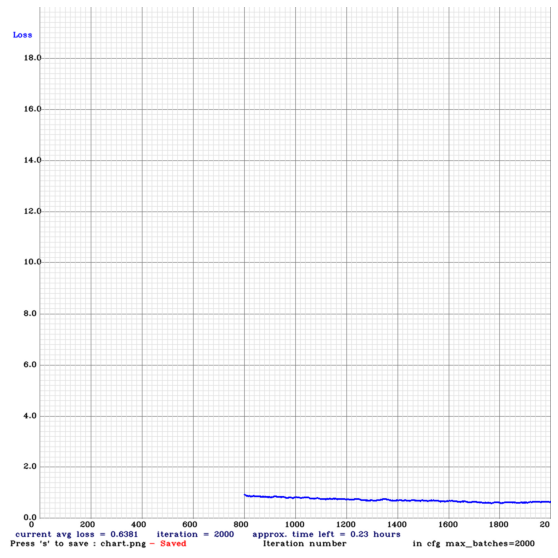

In [15]:
imShow('chart.png')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

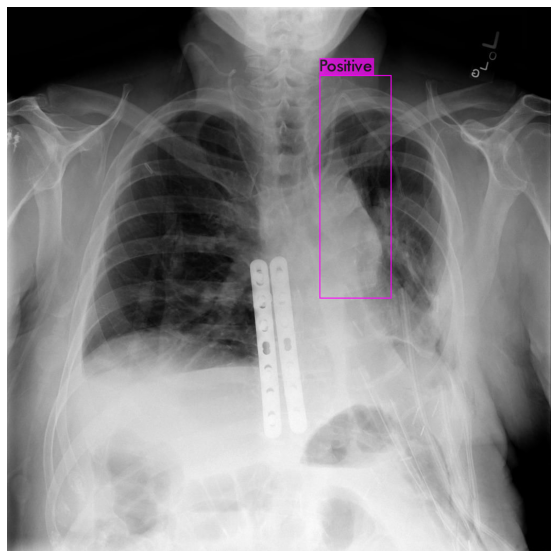

In [34]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /content/drive/'My Drive'/pneumonia/backup/yolov3_custom_last.weights /content/drive/'My Drive'/pneumonia/train_images/01cd2ba5-2baf-44b2-bf15-ee57e1ea4599.jpg -thresh 0.3
imShow('predictions.jpg')

**Real Bounding boxes**

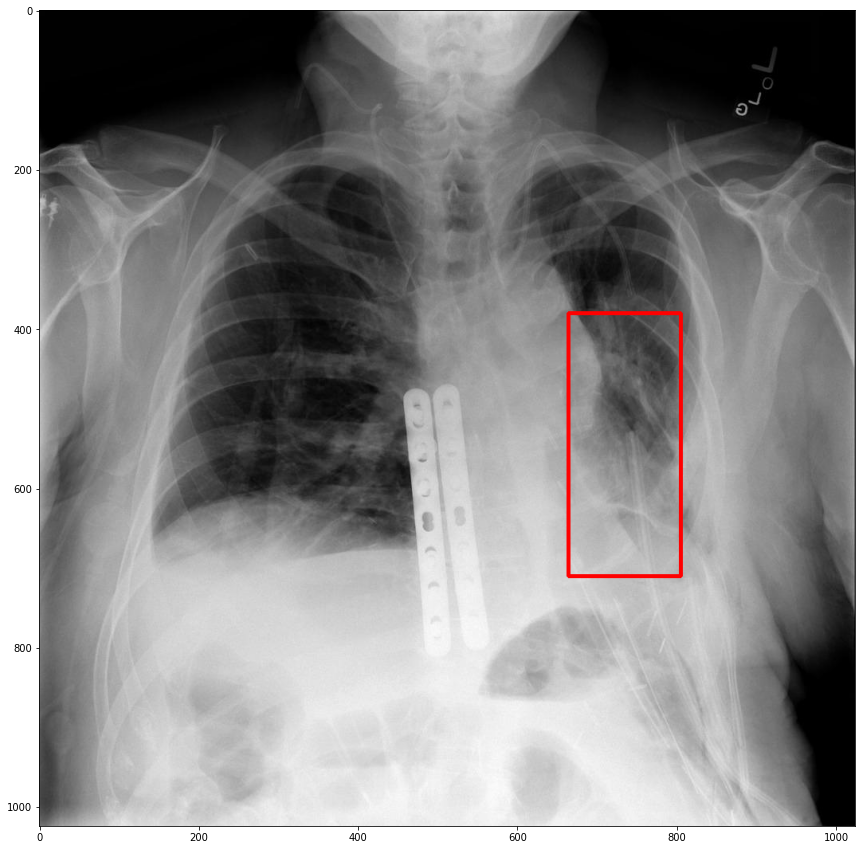

In [33]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
plt.figure(figsize=(20,15))

df=pd.read_csv('/content/drive/My Drive/pneumonia/csv.csv')

name='01cd2ba5-2baf-44b2-bf15-ee57e1ea4599'

s = df[df['patientId'] == name]

path=os.path.join('/content/drive/My Drive/pneumonia/train_images',name+'.jpg')
img=plt.imread(path)

for _,row in s.iterrows():
    x=int(row['x'])
    y=int(row['y'])
    w=int(row['width'])
    h=int(row['height'])
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
plt.imshow(img,cmap='gray')
